<a href="https://colab.research.google.com/github/rehammahal/COVID-19-project/blob/main/DataVisual_TopTenCities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

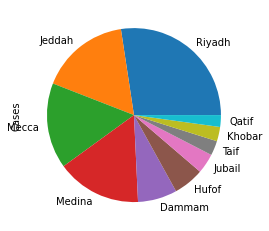

In [5]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt

path = "COVID19-project.xlsx"

covidData = pn.read_excel(path, skipfooter = 29597)
covidData = covidData[['Indicator', 'Date', 'region', 'City', 'Cases']]
covidData = covidData.drop(covidData[(covidData.region == "Total")].index) # myData = myData[myData.region != "Total"]
covidData = covidData.drop(covidData[(covidData.Cases == "?")].index)
covidData["Cases"] = covidData["Cases"].astype('float64')

covidData.set_index('City', inplace = True)
city_data = covidData.groupby('City', axis = 0).sum()
city_data.sort_values(['Cases'], ascending = False, axis = 0, inplace = True)
city_top10 = city_data.head(10)
city_top10['Cases'].plot(kind = 'pie')
plt.show()